In [1]:
sys.path.insert(0, './common')

import numpy as np
import sys
import wave
import a2c_model

In [12]:
env = wave.WaveEnv()

WAVE environment created.


In [4]:
model = a2c_model.A2C(64, 2, 512, lr=1e-4)
save_path = './models/a2c1.pth'
model.set_model_save_path(save_path)

In [4]:
model.load_model()

Model loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


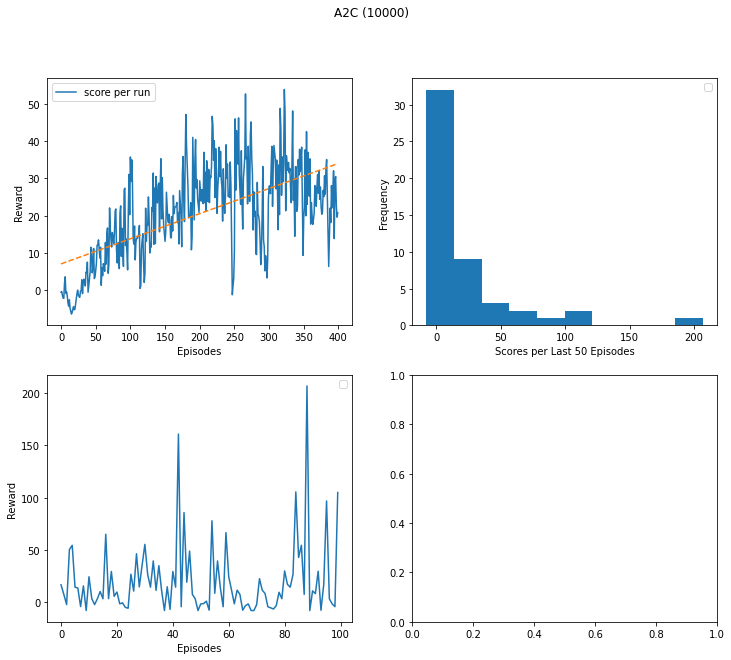

EPOCH: 9999, total reward: 105.04163476871327, timestep: 1189


In [13]:
model.set_train_params(max_step=2000)
model.train(env, 10000, show_plot=True)

In [20]:
model.save_model()

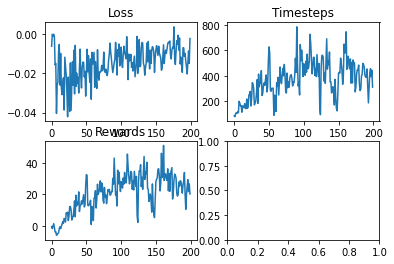

In [14]:
model.plot_train_memory(100)

In [15]:
import numpy as np
import torch

import env_interface

def test(model, env: env_interface.EnvInterface):
    state, is_done = env.reset()
    timestep = 0
    total_reward = 0
    while not is_done:
        timestep += 1
        predictions = model.actor(torch.Tensor(state)).detach().numpy()
        print(predictions)

        action = np.argmax(predictions)
        state, reward, is_done = env.step(action)
        print(reward)
        total_reward += reward

    env.close()
    return total_reward, timestep

In [19]:
env = wave.WaveEnv(5)
model.test(env)
# test(model, env)

WAVE environment created.


(5.994216650025919, 187)

In [30]:
env.close()